# Lab | Customer Analysis Round 6


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime
import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore') 

In [2]:
df1 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df1 

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
df1.columns = df1.columns.str.capitalize()
df1

,Customer,State,Customer lifetime value,Response,Coverage,Education,Effective to date,Employmentstatus,Gender,Income,...,Months since policy inception,Number of open complaints,Number of policies,Policy type,Policy,Renew offer type,Sales channel,Total claim amount,Vehicle class,Vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
df1.dtypes

Customer                          object
State                             object
Customer lifetime value          float64
Response                          object
Coverage                          object
Education                         object
Effective to date                 object
Employmentstatus                  object
Gender                            object
Income                             int64
Location code                     object
Marital status                    object
Monthly premium auto               int64
Months since last claim            int64
Months since policy inception      int64
Number of open complaints          int64
Number of policies                 int64
Policy type                       object
Policy                            object
Renew offer type                  object
Sales channel                     object
Total claim amount               float64
Vehicle class                     object
Vehicle size                      object
dtype: object

In [5]:
df1.isna().sum()

Customer                         0
State                            0
Customer lifetime value          0
Response                         0
Coverage                         0
Education                        0
Effective to date                0
Employmentstatus                 0
Gender                           0
Income                           0
Location code                    0
Marital status                   0
Monthly premium auto             0
Months since last claim          0
Months since policy inception    0
Number of open complaints        0
Number of policies               0
Policy type                      0
Policy                           0
Renew offer type                 0
Sales channel                    0
Total claim amount               0
Vehicle class                    0
Vehicle size                     0
dtype: int64

In [6]:
df1 = df1.dropna(subset=['State', 'Response', 'Months since last claim', 
                         'Number of open complaints', 'Vehicle class'])
df1.isna().sum()

Customer                         0
State                            0
Customer lifetime value          0
Response                         0
Coverage                         0
Education                        0
Effective to date                0
Employmentstatus                 0
Gender                           0
Income                           0
Location code                    0
Marital status                   0
Monthly premium auto             0
Months since last claim          0
Months since policy inception    0
Number of open complaints        0
Number of policies               0
Policy type                      0
Policy                           0
Renew offer type                 0
Sales channel                    0
Total claim amount               0
Vehicle class                    0
Vehicle size                     0
dtype: int64

In [7]:
df1['Month'] = pd.DatetimeIndex(df1['Effective to date']).month
df1

,Customer,State,Customer lifetime value,Response,Coverage,Education,Effective to date,Employmentstatus,Gender,Income,...,Number of open complaints,Number of policies,Policy type,Policy,Renew offer type,Sales channel,Total claim amount,Vehicle class,Vehicle size,Month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [8]:
df1[df1['Month'] <= 2]

,Customer,State,Customer lifetime value,Response,Coverage,Education,Effective to date,Employmentstatus,Gender,Income,...,Number of open complaints,Number of policies,Policy type,Policy,Renew offer type,Sales channel,Total claim amount,Vehicle class,Vehicle size,Month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [9]:
df1['Month'].value_counts()

1    4898
2    4236
Name: Month, dtype: int64

Lab 3

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer lifetime value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective to date              9134 non-null   object 
 7   Employmentstatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location code                  9134 non-null   object 
 11  Marital status                 9134 non-null   object 
 12  Monthly premium auto           9134 non-null   i

In [11]:
df1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Customer lifetime value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38
Income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00
Monthly premium auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00
Months since last claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00
Months since policy inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00
Number of open complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
Number of policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00
Total claim amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24
Month,9134.0,1.46,0.50,1.00,1.00,1.00,2.00,2.00


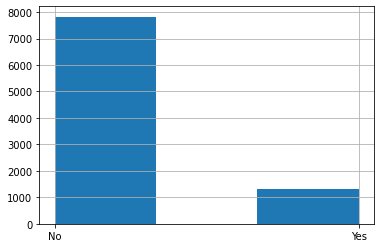

In [12]:
df1['Response'].hist(bins=3, xlabelsize=10) #bins = el numero de "columnas" que quiero
plt.show()

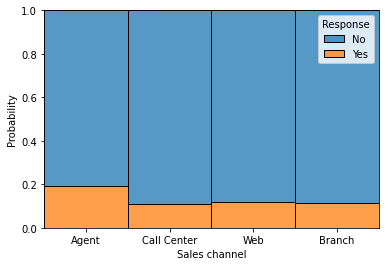

In [13]:
sns.histplot(df1, x='Sales channel', hue='Response', stat='probability', multiple="fill") #mirar esto detenidamente

plt.show()

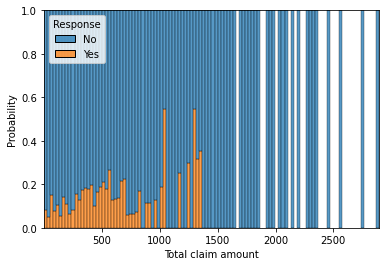

In [14]:
sns.histplot(df1, x='Total claim amount', hue='Response', stat='probability', multiple="fill") 

plt.show()

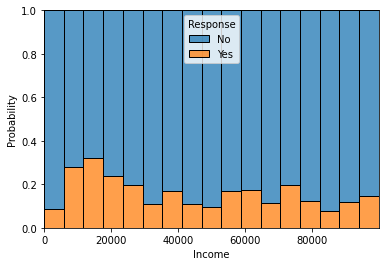

In [15]:
sns.histplot(df1, x='Income', hue='Response', stat='probability', multiple="fill") 

plt.show()

https://github.com/felagund93/lab-customer-analysis-round-3/blob/master/lab_customer_analysis_r3.ipynb

Lab-4

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer lifetime value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective to date              9134 non-null   object 
 7   Employmentstatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location code                  9134 non-null   object 
 11  Marital status                 9134 non-null   object 
 12  Monthly premium auto           9134 non-null   i

In [17]:
numerical = df1.select_dtypes(np.number).round(2)
numerical

,Customer lifetime value,Income,Monthly premium auto,Months since last claim,Months since policy inception,Number of open complaints,Number of policies,Total claim amount,Month
0,2763.52,56274,69,32,5,0,1,384.81,2
1,6979.54,0,94,13,42,0,8,1131.46,1
2,12887.43,48767,108,18,38,0,2,566.47,2
3,7645.86,0,106,18,65,0,7,529.88,1
4,2813.69,43836,73,12,44,0,1,138.13,2
...,...,...,...,...,...,...,...,...,...
9129,23405.99,71941,73,18,89,0,2,198.23,2
9130,3096.51,21604,79,14,28,0,1,379.20,2
9131,8163.89,0,85,9,37,3,2,790.78,2
9132,7524.44,21941,96,34,3,0,3,691.20,2


In [18]:
categorical = df1.select_dtypes(np.object)
categorical

,Customer,State,Response,Coverage,Education,Effective to date,Employmentstatus,Gender,Location code,Marital status,Policy type,Policy,Renew offer type,Sales channel,Vehicle class,Vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


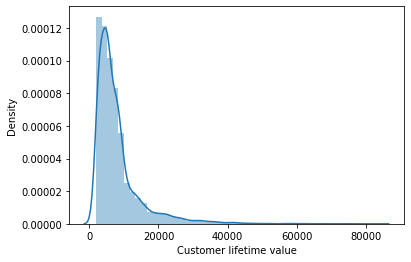

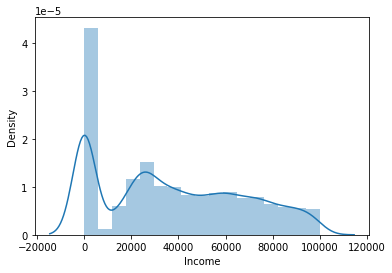

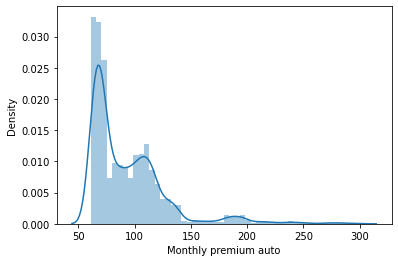

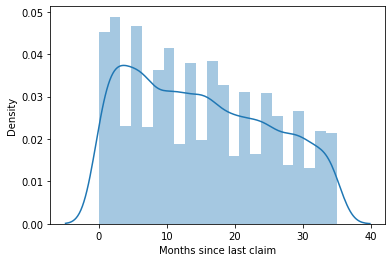

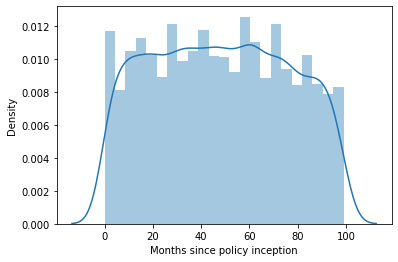

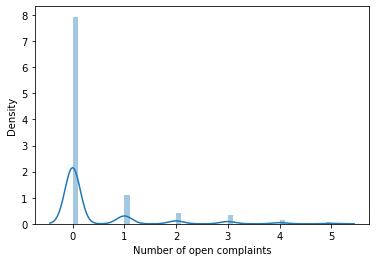

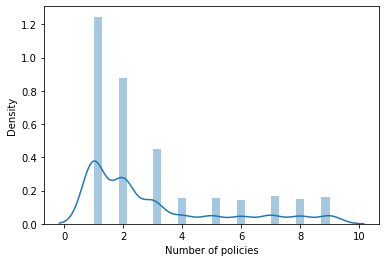

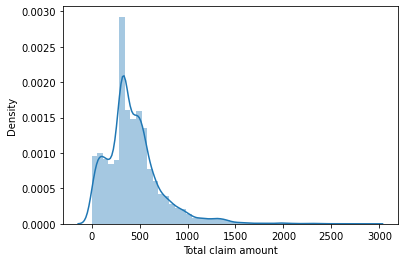

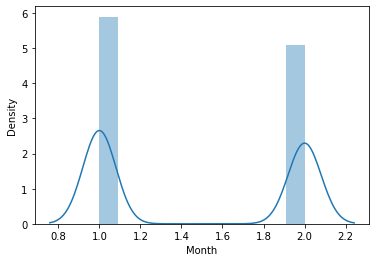

In [19]:
for col in numerical.columns:
    sns.distplot(numerical[col])
    plt.show()

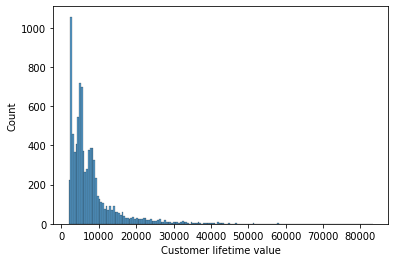

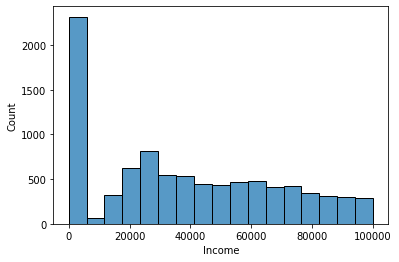

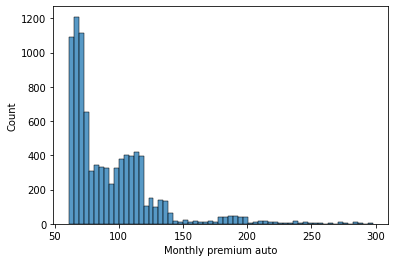

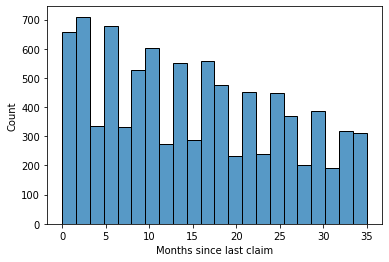

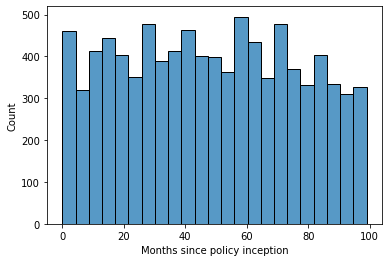

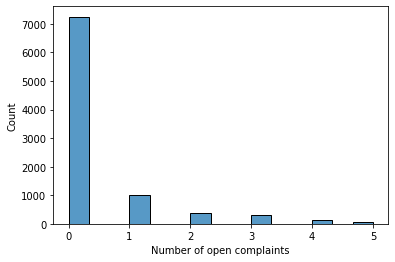

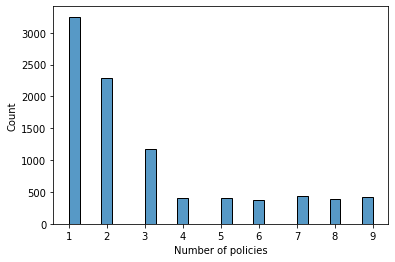

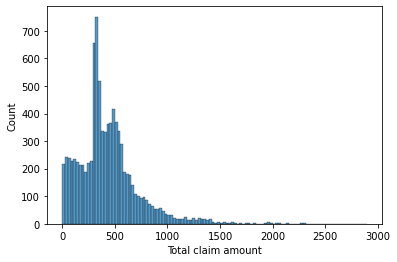

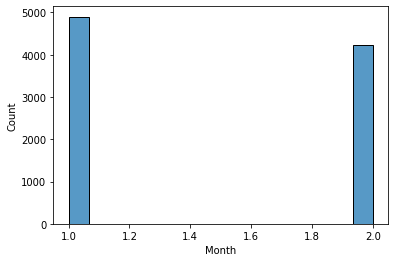

In [20]:
for col in numerical.columns:
    sns.histplot(numerical[col])
    plt.show()

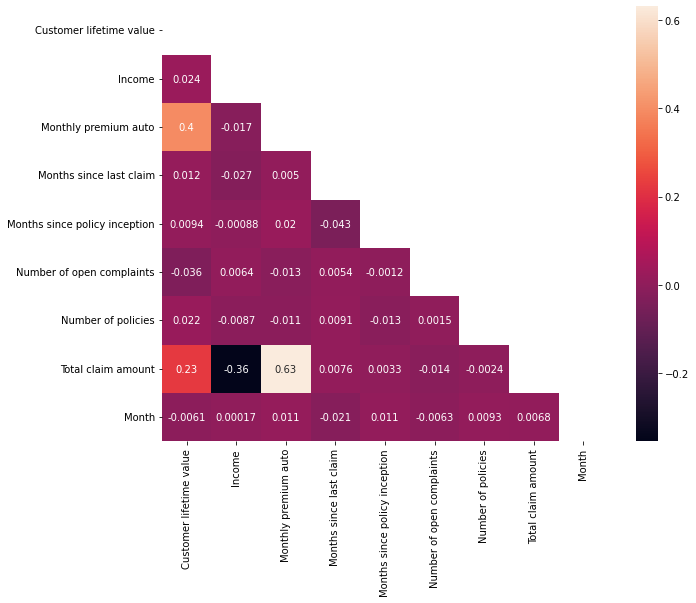

In [21]:
mask = np.zeros_like(numerical.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numerical.corr(), mask=mask, annot=True)
plt.show()

Normalizations
BoxCox transformation (numericals, total claim amount excluded)

,Customer lifetime value,Income,Monthly premium auto,Months since last claim,Months since policy inception,Number of open complaints,Number of policies,Total claim amount,Month
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035801,0.561741
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357700,0.000000
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071840,0.561741
3,2.759124,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763326,0.000000
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560136,0.561741
...,...,...,...,...,...,...,...,...,...
9129,2.801169,1448.531450,0.685461,7.347815,33.090025,0.648045,0.607328,23.588674,0.561741
9130,2.711029,697.790558,0.685606,6.134207,13.709541,0.648045,0.000000,32.793049,0.561741
9131,2.762062,1167.961720,0.685725,4.379465,17.034934,1.176115,0.607328,47.263742,0.561741
9132,2.758396,704.383672,0.685898,11.319628,1.667871,0.648045,0.893486,44.225295,0.561741


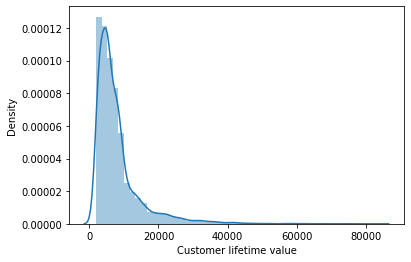

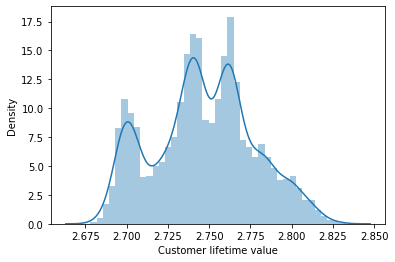

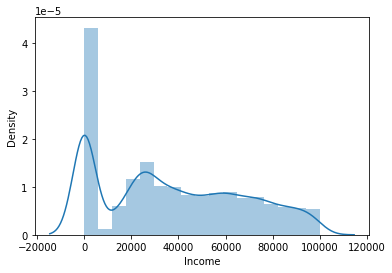

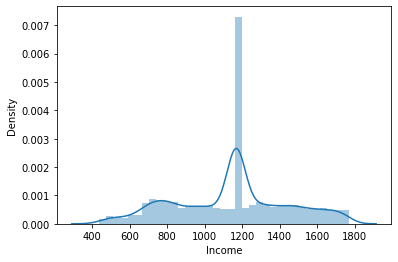

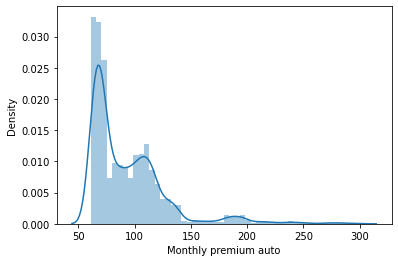

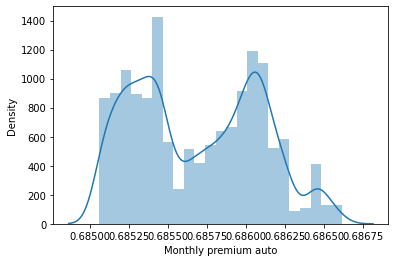

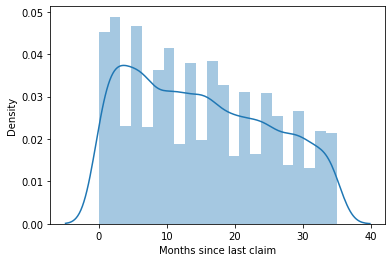

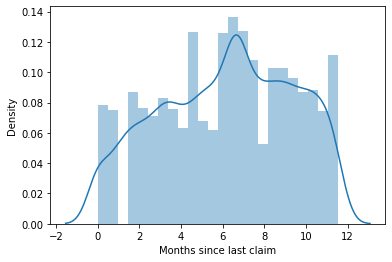

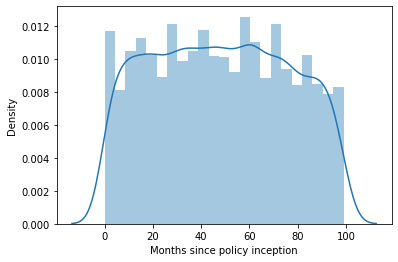

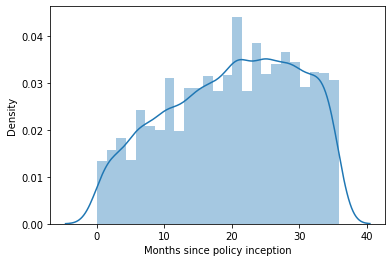

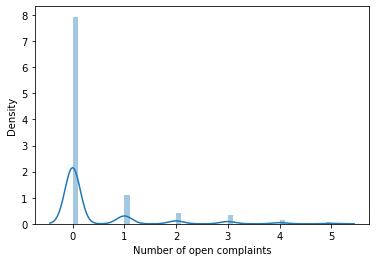

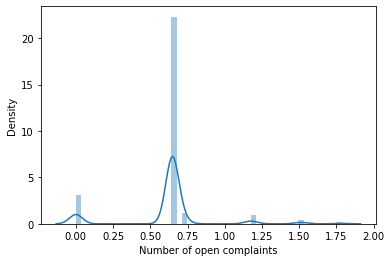

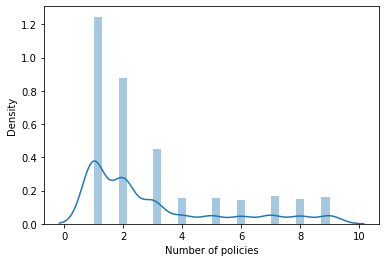

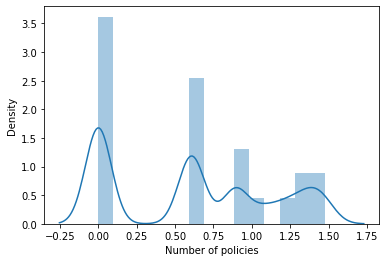

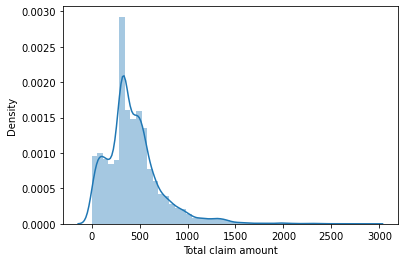

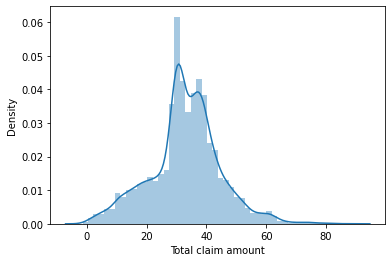

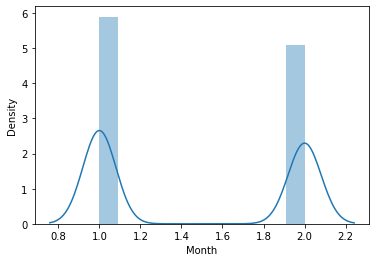

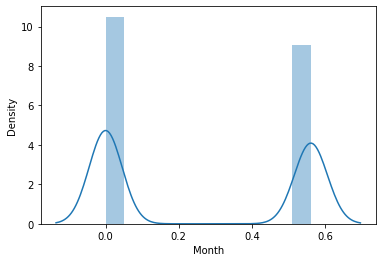

In [22]:
def boxcox_transform(df1):
    numeric_cols = df1.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols} #it will first generate this dictionary
    for column in numeric_cols:
        #In this case, I need the confidence interval data
        # since i know any columns should take negative numbers, to avoid -inf in df
        df1[column] = np.where(df1[column]<=0, np.NAN, df1[column]) #boxcox does not work with negatives
        df1[column] = df1[column].fillna(df1[column].mean()) #I fill the nan's with the mean
        transformed_data, ci = stats.boxcox(df1[column]) 
        df1[column] = transformed_data
        _ci[column] = [ci] 
    return df1, _ci

num_copy = numerical.copy() #It is important to do it this way with the .copy method.

trans, _ci = boxcox_transform(num_copy)
display(trans)

for col in trans:
    sns.distplot(numerical[col])
    plt.show()
    sns.distplot(trans[col])
    plt.show()

XY split (for StandardScaler)

In [23]:
y = df1['Total claim amount']
X = df1.drop(['Total claim amount'], axis=1)

X_num = X.select_dtypes(include = np.number) #np.number includes int and float
X_cat = X.select_dtypes(include = np.object)

In [24]:
from sklearn.preprocessing import StandardScaler

import pickle

# using standard scaler
transformer = StandardScaler() # StandardScaler and MinMax scaler works row wise,
# so make sure you do the train-test split first (optional)
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized.shape
x_standardized=pd.DataFrame(x_standardized, index=None, columns=X_num.columns)
display(x_standardized)

,Customer lifetime value,Income,Monthly premium auto,Months since last claim,Months since policy inception,Number of open complaints,Number of policies,Month
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,1.075304
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,-0.929969
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,1.075304
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,-0.929969
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,1.075304
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,1.075304
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,1.075304
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.075304
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,1.075304


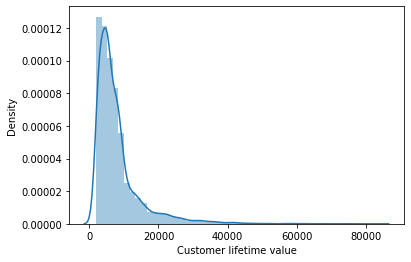

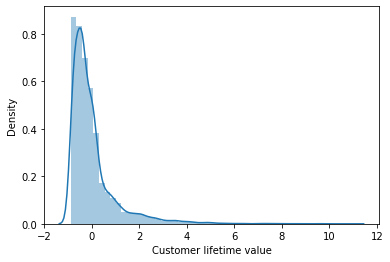

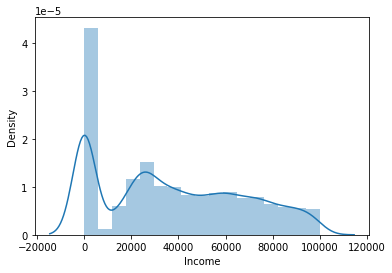

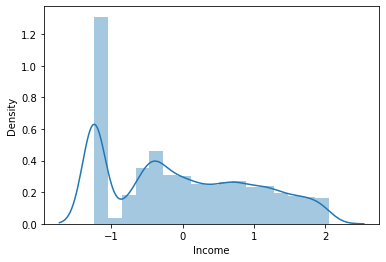

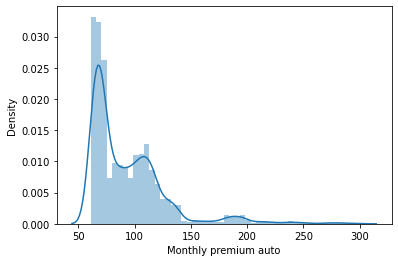

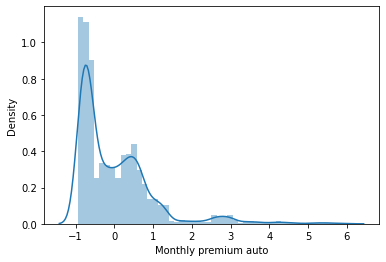

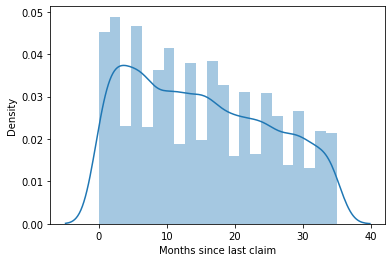

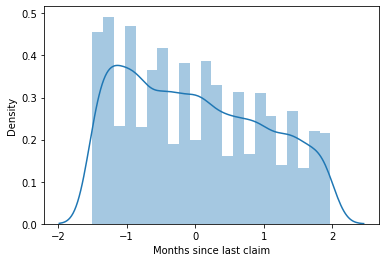

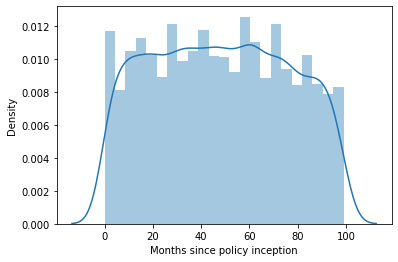

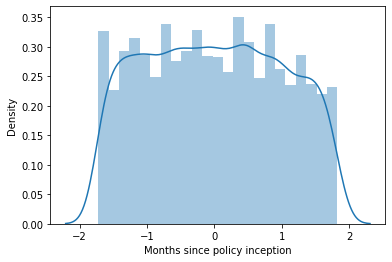

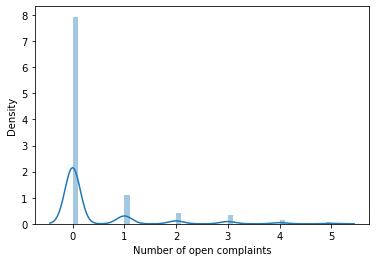

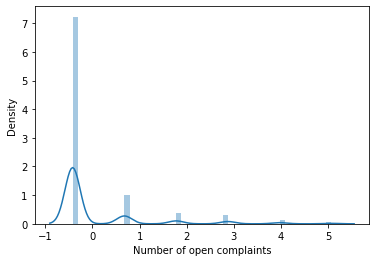

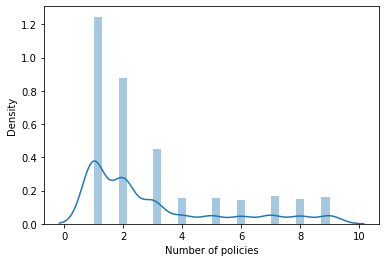

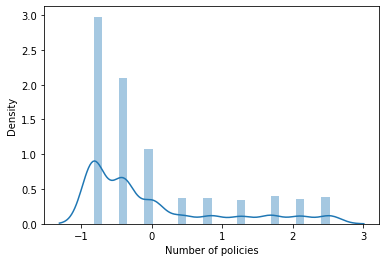

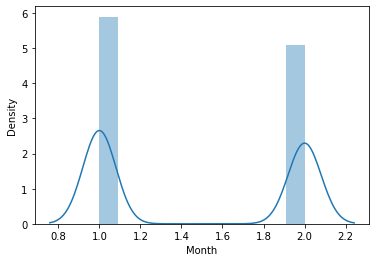

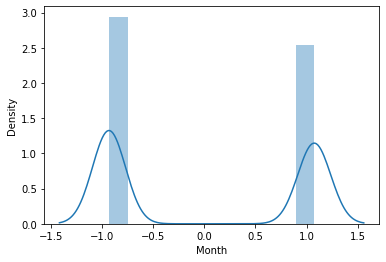

In [25]:
for col in X_num:
    sns.distplot(X_num[col])
    plt.show()
    sns.distplot(x_standardized[col])
    plt.show()

LAB 6

In [26]:
#X-y split

y = df1['Total claim amount']
X = df1.drop(['Total claim amount'], axis=1)

In [27]:
# Separate numerical and categorical values

X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [28]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column])
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column]) 
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

X_num_trans, _ci = boxcox_transform(X_num.copy()) #IMPORTANT: use copy method
X_num_trans

,Customer lifetime value,Income,Monthly premium auto,Months since last claim,Months since policy inception,Number of open complaints,Number of policies,Month
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,0.561741
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,0.000000
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,0.561741
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,0.000000
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,0.561741
...,...,...,...,...,...,...,...,...
9129,2.801170,1448.531450,0.685461,7.347815,33.090025,0.648045,0.607328,0.561741
9130,2.711030,697.790558,0.685606,6.134207,13.709541,0.648045,0.000000,0.561741
9131,2.762062,1167.961720,0.685725,4.379465,17.034934,1.176115,0.607328,0.561741
9132,2.758397,704.383672,0.685898,11.319628,1.667871,0.648045,0.893486,0.561741


In [29]:
encoder = OneHotEncoder(handle_unknown='error', drop='first') #drop one column for efficiency. It can be deduced
X_cat_encoded = encoder.fit_transform(X_cat).toarray()
X_cat_encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [30]:
# Concat DataFrames

column_names = list(X_num_trans.columns) # get list of numerical column names
column_names.extend(list(encoder.get_feature_names())) # add list of dummified categorical column names

X_numcat = np.concatenate([X_num_trans, X_cat_encoded], axis=1)
X_ready = pd.DataFrame(data=X_numcat, index=X.index, columns=column_names)
X_ready

,Customer lifetime value,Income,Monthly premium auto,Months since last claim,Months since policy inception,Number of open complaints,Number of policies,Month,x0_AA11235,x0_AA16582,...,x13_Branch,x13_Call Center,x13_Web,x14_Luxury Car,x14_Luxury SUV,x14_SUV,x14_Sports Car,x14_Two-Door Car,x15_Medsize,x15_Small
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,0.561741,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,0.561741,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,0.561741,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.801170,1448.531450,0.685461,7.347815,33.090025,0.648045,0.607328,0.561741,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,2.711030,697.790558,0.685606,6.134207,13.709541,0.648045,0.000000,0.561741,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,2.762062,1167.961720,0.685725,4.379465,17.034934,1.176115,0.607328,0.561741,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,2.758397,704.383672,0.685898,11.319628,1.667871,0.648045,0.893486,0.561741,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_ready, y, test_size=0.3, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
prediction = model.predict(X_test)

R2 = r2_score(y_test, prediction)
MSE = mean_squared_error(y_test, prediction, squared=True)
RMSE = mean_squared_error(y_test, prediction, squared=False)
MAE = mean_absolute_error(y_test, prediction)

print("R2:", round(R2,2))
print("MSE:", round(MSE,2))
print("RMSE:", round(RMSE,2))
print("MAE:", round(MAE,2))

R2: 0.71
MSE: 24061.15
RMSE: 155.12
MAE: 107.08
